#Download helper function

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-03-07 07:20:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-07 07:20:32 (83.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, unzip_data, plot_loss_curves, walk_through_dir

# Get The data

In [3]:
## Download and unzip
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-03-07 07:20:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 74.125.126.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  84.4MB/s    in 1.9s    

2023-03-07 07:20:43 (84.4 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

## Prepare The data

In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [6]:
import tensorflow as tf
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
train_data.element_spec


(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))

In [9]:
for images, labels in train_data.take(1):
  print(images,labels)

tf.Tensor(
[[[[1.06219383e+02 6.62908096e+01 2.12193871e+01]
   [7.51071396e+01 3.32499962e+01 3.87755060e+00]
   [1.16658173e+02 7.14387817e+01 3.65663338e+01]
   ...
   [1.67112518e+02 1.04035988e+02 3.62553253e+01]
   [1.90953964e+02 1.25122314e+02 5.69539146e+01]
   [1.64065765e+02 9.42238770e+01 2.55300655e+01]]

  [[9.89030609e+01 5.01887741e+01 1.08877516e+01]
   [1.10719406e+02 5.80765457e+01 2.50051174e+01]
   [1.78627548e+02 1.24897964e+02 8.72551041e+01]
   ...
   [1.63550919e+02 1.01295837e+02 2.42958775e+01]
   [1.33311172e+02 7.31632233e+01 3.51021385e+00]
   [1.40056335e+02 7.96991959e+01 1.68165779e+01]]

  [[1.63908157e+02 1.08122444e+02 5.85561142e+01]
   [1.44178574e+02 8.55204086e+01 4.35612183e+01]
   [1.26862244e+02 6.40306091e+01 2.10561218e+01]
   ...
   [1.68484192e+02 1.03963814e+02 1.37751322e+01]
   [1.38800934e+02 8.26733932e+01 8.88779831e+00]
   [1.36740219e+02 8.51739273e+01 2.83985405e+01]]

  ...

  [[2.50785736e+02 2.38290848e+02 1.57852020e+02]
   [2

#  Create Model

In [10]:
import tensorflow as tf
# 1. Base Model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2 Freeze the layers and dont train
base_model.trainable=False

# 3 GET THE INPUTS
inputs = tf.keras.layers.Input(shape=(224,224,3), name="InputLayer")

# 4. Rescale the inputs ..... This is not for all the models like efficinet net
# X = tf.keras.layers.experimental.preprosessing.Rescalling(1/225.) (inputs)

# 5 top layers after the base model layers
x = base_model(inputs)

# 6 pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePoolingLayer")(x)

# 7 output
output = tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer")(x)

# 8 CREATE THE MODLE
model_0 = tf.keras.Model(inputs, output)

# 9 COMPILT
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 10 fit
history_0= model_0.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data),
            callbacks=[create_tensorboard_callback("transfer_learning", "Feature_extraction")])


16705208/16705208 [==============================] - 0s 0us/step


Saving TensorBoard log files to: transfer_learning/Feature_extraction/20230307-072056
Epoch 1/5
24/24 [==============================] - 26s 434ms/step - loss: 1.8262 - accuracy: 0.4440 - val_loss: 1.2719 - val_accuracy: 0.7336
Epoch 2/5
24/24 [==============================] - 8s 335ms/step - loss: 1.0758 - accuracy: 0.7627 - val_loss: 0.8564 - val_accuracy: 0.8180
Epoch 3/5
24/24 [==============================] - 9s 367ms/step - loss: 0.7807 - accuracy: 0.8333 - val_loss: 0.6901 - val_accuracy: 0.8436
Epoch 4/5
24/24 [==============================] - 7s 299ms/step - loss: 0.6371 - accuracy: 0.8573 - val_loss: 0.6059 - val_accuracy: 0.8548
Epoch 5/5
24/24 [==============================] - 8s 331ms/step - loss: 0.5461 - accuracy: 0.8720 - val_loss: 0.5555 - val_accuracy: 0.8604


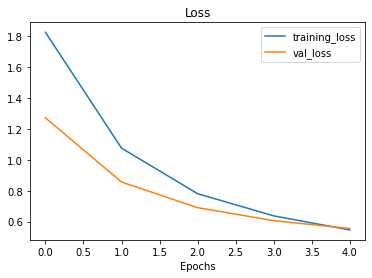

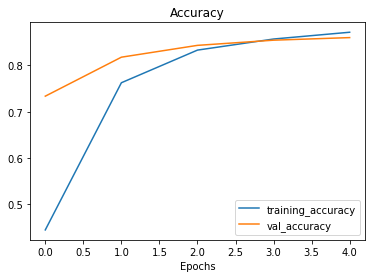

In [11]:
plot_loss_curves(history_0)

# MODEL_1 1 PERCENT DATA

In [12]:
# Get the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-03-07 07:49:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 74.125.126.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   153MB/s    in 0.8s    

2023-03-07 07:49:27 (153 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [13]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [80]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [81]:
import tensorflow as tf

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=(224,224),
                                                                           batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=(224,224),
                                                                batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [82]:
for imgage_1, lable in train_data_1_percent.take(1):
  print(imgage_1.shape)


(32, 224, 224, 3)


In [83]:
train_data_1_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [84]:

# augementing layer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomRotation(0.2),
    # preprocessing.Rescaling(1/255.) 
], name="data_augementation")

TensorShape([466, 576, 3])

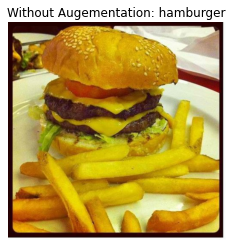

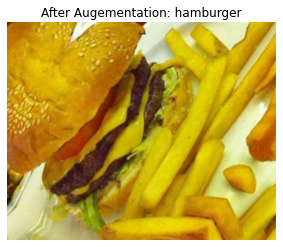

In [85]:
# lets see if the augementation is working
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

random_class = random.choice(train_data_1_percent.class_names)
target_dir = train_dir_1_percent + "/" + random_class
random_img = random.choice(os.listdir(target_dir))
img_path =target_dir + "/" + random_img
img = mpimg.imread(img_path)
plt.imshow(img)
plt.title(f"Without Augementation: {random_class}")
plt.axis(False)

# now augemted one
img.shape
augemented_img = data_augmentation(img)
plt.figure()
plt.imshow(augemented_img/255.)
plt.title(f"After Augementation: {random_class}")
plt.axis(False)
augemented_img.shape


In [92]:
# create the model

# baseline first
base_model_1 = keras.applications.EfficientNetB0(include_top=False)
base_model_1.trainable = False

# inputs
inputs = layers.Input(shape=(224,224,3), name="input_layer")

# data augementsat

x = data_augmentation(inputs)

# feed the input into the base model
x = base_model_1(x, training=False)

# pooling layer
x = layers.GlobalAveragePooling2D(name="GlobalPoolinglayer")(x)

# output
outputs = layers.Dense(10, activation='softmax', name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)
model_1.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data = test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="model_1_percent")])

Saving TensorBoard log files to: transfer_learning/model_1_percent/20230307-085959
Epoch 1/5


3/3 [==============================] - ETA: 0s - loss: 2.1709 - accuracy: 0.2000

3/3 [==============================] - 18s 3s/step - loss: 2.1709 - accuracy: 0.2000 - val_loss: 2.1532 - val_accuracy: 0.2368
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 1.9440 - accuracy: 0.4429 - val_loss: 2.0375 - val_accuracy: 0.3224
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 1.7497 - accuracy: 0.5286 - val_loss: 1.9220 - val_accuracy: 0.3865
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.5816 - accuracy: 0.6857 - val_loss: 1.8211 - val_accuracy: 0.4424
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.4553 - accuracy: 0.7000 - val_loss: 1.7101 - val_accuracy: 0.5033


In [94]:
# evaluate
model_1.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 1.7301 - accuracy: 0.4948


[1.7301267385482788, 0.49480000138282776]

In [95]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augementation (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GlobalPoolinglayer (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

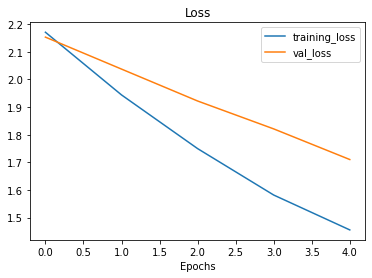

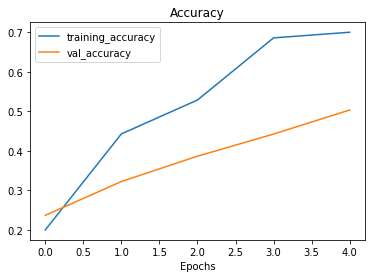

In [96]:
plot_loss_curves(history_1)